# Depuración y selección de variables
<hr>

<code> **Proyecto de Datos II** </code>

Esta última fase del preprocesamiento tiene lugar tras la exploración de variables, aplicando las conclusiones extraídas de la misma:

- Limpiamos las variables turbulence_category y last_event_turb_cat eliminando lo que hay entre paréntesis (de cara a las gráficas).
- Eliminamos aquellos outliers de la variable respuesta que consideramos que eran errores de medición / físicamente imposibles:
    - Tiempos de espera inferiores a los 20 segundos: el runway time occupancy (ROT) es en promedio de 30 segundos, es imposible que aviones despeguen tan rápido.
    - Tiempos de espera superiores a los 1.250 segundos: procedentes de aeronaves con ICAO nula ‘______’ o que consideramos que pasaron por el punto pero a continuación se cambiaron de posición.
    - Se eliminaron 559 filas. 16 vuelos distintos. Un 0.36% del total.

- Eliminamos variables por las siguientes razones:
    - Presencia de nulos: snow_depth (m)
    - Ausencia de varianza: last_event
    - Evitar colinealidad: lat, lon, apparent_temperature (°C), rain (mm), pressure_msl (hPa), wind_speed_100m (km/h), wind_gusts_10m (km/h), soil_temperature_0_to_7cm (°C), soil_temperature_7_to_28cm (°C), soil_temperature_28_to_100cm (°C), soil_moisture_7_to_28cm (m³/m³), soil_moisture_28_to_100cm (m³/m³), vapour_pressure_deficit (kPa
    - Innecesarias: event_timestamp, first_holding_time, first_airborne_time, first_on_ground_time, time
    - Las variables timestamp, icao y callsign las dejamos para poder mantener un registro de la procedencia de los datos.


Hemos decidido no realizar ningún preprocesado adicional en esta fase. Cualquier transformación adicional a los datos será propia de cada uno de los modelos.


In [1]:
import pandas as pd

In [3]:
df = pd.read_parquet("datos_final.parquet")
df_original = df.copy()

In [5]:
df

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,lat,lon,...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499481,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499489,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499500,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,40.492569,-3.57614,...,5.5,7.1,9.0,0.273,13.9,0.243,0.133,0.141,0.0,0.28


### Modificaciones estéticas

In [8]:
import re

# Limpiamos la columna 'turbulence_category' eliminando lo que esté entre paréntesis
df["turbulence_category"] = df["turbulence_category"].apply(lambda x: re.sub(r"\(.*\)", "", str(x)).strip())
df["last_event_turb_cat"] = df["last_event_turb_cat"].apply(lambda x: re.sub(r"\(.*\)", "", str(x)).strip())

### Outliers

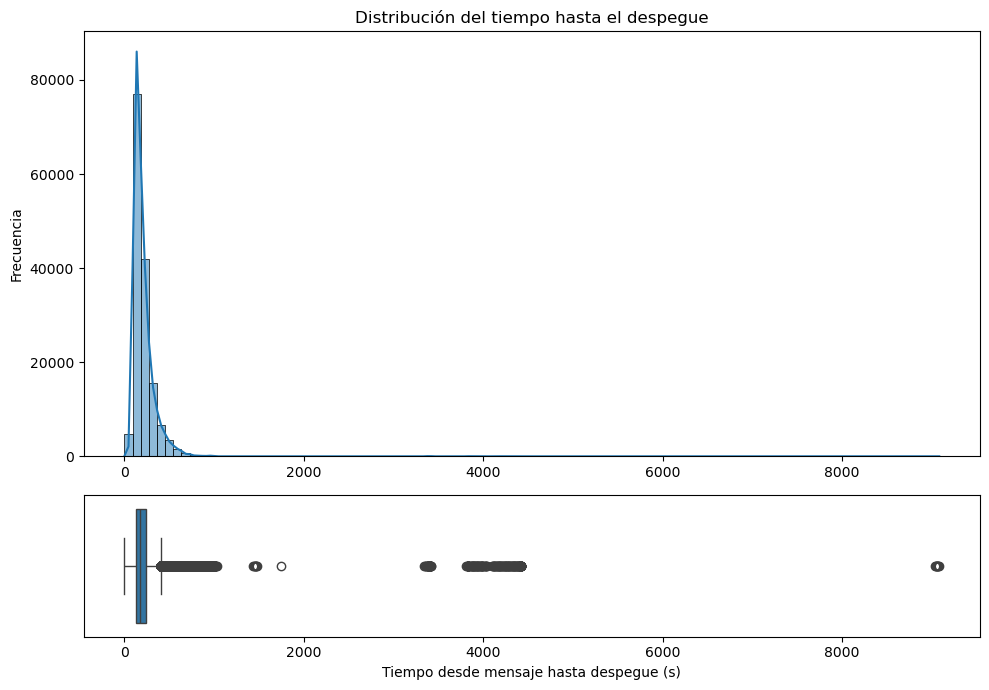

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Crear figura y rejilla
fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma con KDE en la parte superior
ax0 = plt.subplot(gs[0])
sns.histplot(df["takeoff_time"], bins=100, kde=True, ax=ax0)
ax0.set_title("Distribución del tiempo hasta el despegue")
ax0.set_xlabel("")  # Ocultar etiqueta para no repetir
ax0.set_ylabel("Frecuencia")

# Boxplot horizontal debajo
ax1 = plt.subplot(gs[1], sharex=ax0)
sns.boxplot(x=df["takeoff_time"], ax=ax1, orient='h')
ax1.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1.set_yticks([])  # Ocultar eje y porque no aporta aquí

plt.tight_layout()
plt.show()


In [12]:
df_original

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,lat,lon,...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499481,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499489,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499500,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,40.492569,-3.57614,...,5.5,7.1,9.0,0.273,13.9,0.243,0.133,0.141,0.0,0.28


In [13]:
from cleaner import Cleaner

LOWER_BOUND = 20
UPPER_BOUND = 1250

df, filas_eliminadas, callsign_invalidos = Cleaner.remove_bounds_callsigns(df, "takeoff_time", LOWER_BOUND, UPPER_BOUND)
print(f"Se eliminaron {filas_eliminadas} filas. {len(callsign_invalidos)} vuelos distintos.")

/var/folders/dp/1z2xwn7516q1b4n5t3nlr0500000gn/T/ipykernel_10902/1223261481.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_invalidas['fecha'] = pd.to_datetime(filas_invalidas['timestamp']).dt.date


Se eliminaron 559 filas. 16 vuelos distintos.


In [16]:
filas_eliminadas / (filas_eliminadas + df.shape[0])

0.00367562449451944

/var/folders/dp/1z2xwn7516q1b4n5t3nlr0500000gn/T/ipykernel_10902/3575081728.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


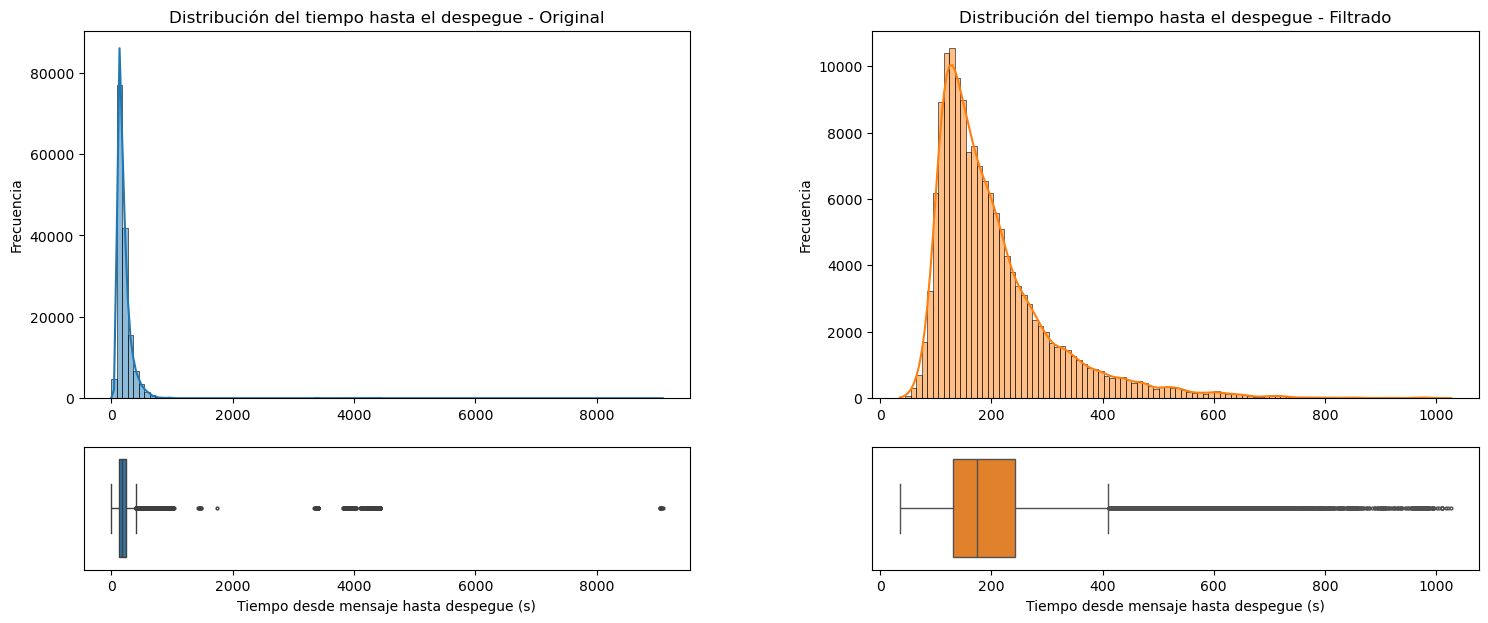

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Crear figura y rejilla general
fig = plt.figure(figsize=(18, 7))
outer_gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

# ====== Izquierda: df_original ======
gs_left = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[0], height_ratios=[3, 1])

# Histograma con KDE
ax0_left = plt.Subplot(fig, gs_left[0])
sns.histplot(df_original["takeoff_time"], bins=100, kde=True, ax=ax0_left, color="#1f77b4")
ax0_left.set_title("Distribución del tiempo hasta el despegue - Original")
ax0_left.set_xlabel("")
ax0_left.set_ylabel("Frecuencia")
fig.add_subplot(ax0_left)

# Boxplot
ax1_left = plt.Subplot(fig, gs_left[1], sharex=ax0_left)
sns.boxplot(x=df_original["takeoff_time"], ax=ax1_left, orient='h', color="#1f77b4", fliersize=2)
ax1_left.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1_left.set_yticks([])
fig.add_subplot(ax1_left)

# ====== Derecha: df ======
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[1], height_ratios=[3, 1])

# Histograma con KDE
ax0_right = plt.Subplot(fig, gs_right[0])
sns.histplot(df["takeoff_time"], bins=100, kde=True, ax=ax0_right, color="#ff7f0e")
ax0_right.set_title("Distribución del tiempo hasta el despegue - Filtrado")
ax0_right.set_xlabel("")
ax0_right.set_ylabel("Frecuencia")
fig.add_subplot(ax0_right)

# Boxplot
ax1_right = plt.Subplot(fig, gs_right[1], sharex=ax0_right)
sns.boxplot(x=df["takeoff_time"], ax=ax1_right, orient='h', color="#ff7f0e", fliersize=2)
ax1_right.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1_right.set_yticks([])
fig.add_subplot(ax1_right)

# Ajustes finales
plt.tight_layout()
plt.show()

### Nulos

In [28]:
df.isna().sum().sum()

1649

In [30]:
for c, x in zip(df.columns, df.isna().sum()):
    print(c, x)

takeoff_time 0
timestamp 0
icao 0
callsign 0
holding_point 0
runway 0
operator 0
turbulence_category 0
lat 0
lon 0
last_min_takeoffs 0
last_event 0
last_min_landings 0
last_event_turb_cat 0
time_since_last_event_seconds 0
time_before_holding_point 0
time_at_holding_point 0
hour 0
weekday 0
is_holiday 0
event_timestamp 0
first_holding_time 0
first_airborne_time 0
first_on_ground_time 0
Z1 0
KA6 0
KA8 0
K3 0
K2 0
K1 0
Y1 0
Y2 0
Y3 0
Y7 0
Z6 0
Z4 0
Z2 0
Z3 0
LF 0
L1 0
LA 0
LB 0
LC 0
LD 0
LE 0
36R_18L 0
32R_14L 0
36L_18R 0
32L_14R 0
time 0
temperature_2m (°C) 0
relative_humidity_2m (%) 0
dew_point_2m (°C) 0
apparent_temperature (°C) 0
precipitation (mm) 0
rain (mm) 0
snowfall (cm) 0
snow_depth (m) 1649
weather_code (wmo code) 0
pressure_msl (hPa) 0
surface_pressure (hPa) 0
cloud_cover (%) 0
cloud_cover_low (%) 0
cloud_cover_mid (%) 0
cloud_cover_high (%) 0
is_day () 0
wind_speed_10m (km/h) 0
wind_speed_100m (km/h) 0
wind_direction_10m (°) 0
wind_direction_100m (°) 0
wind_gusts_10m (km/h) 0

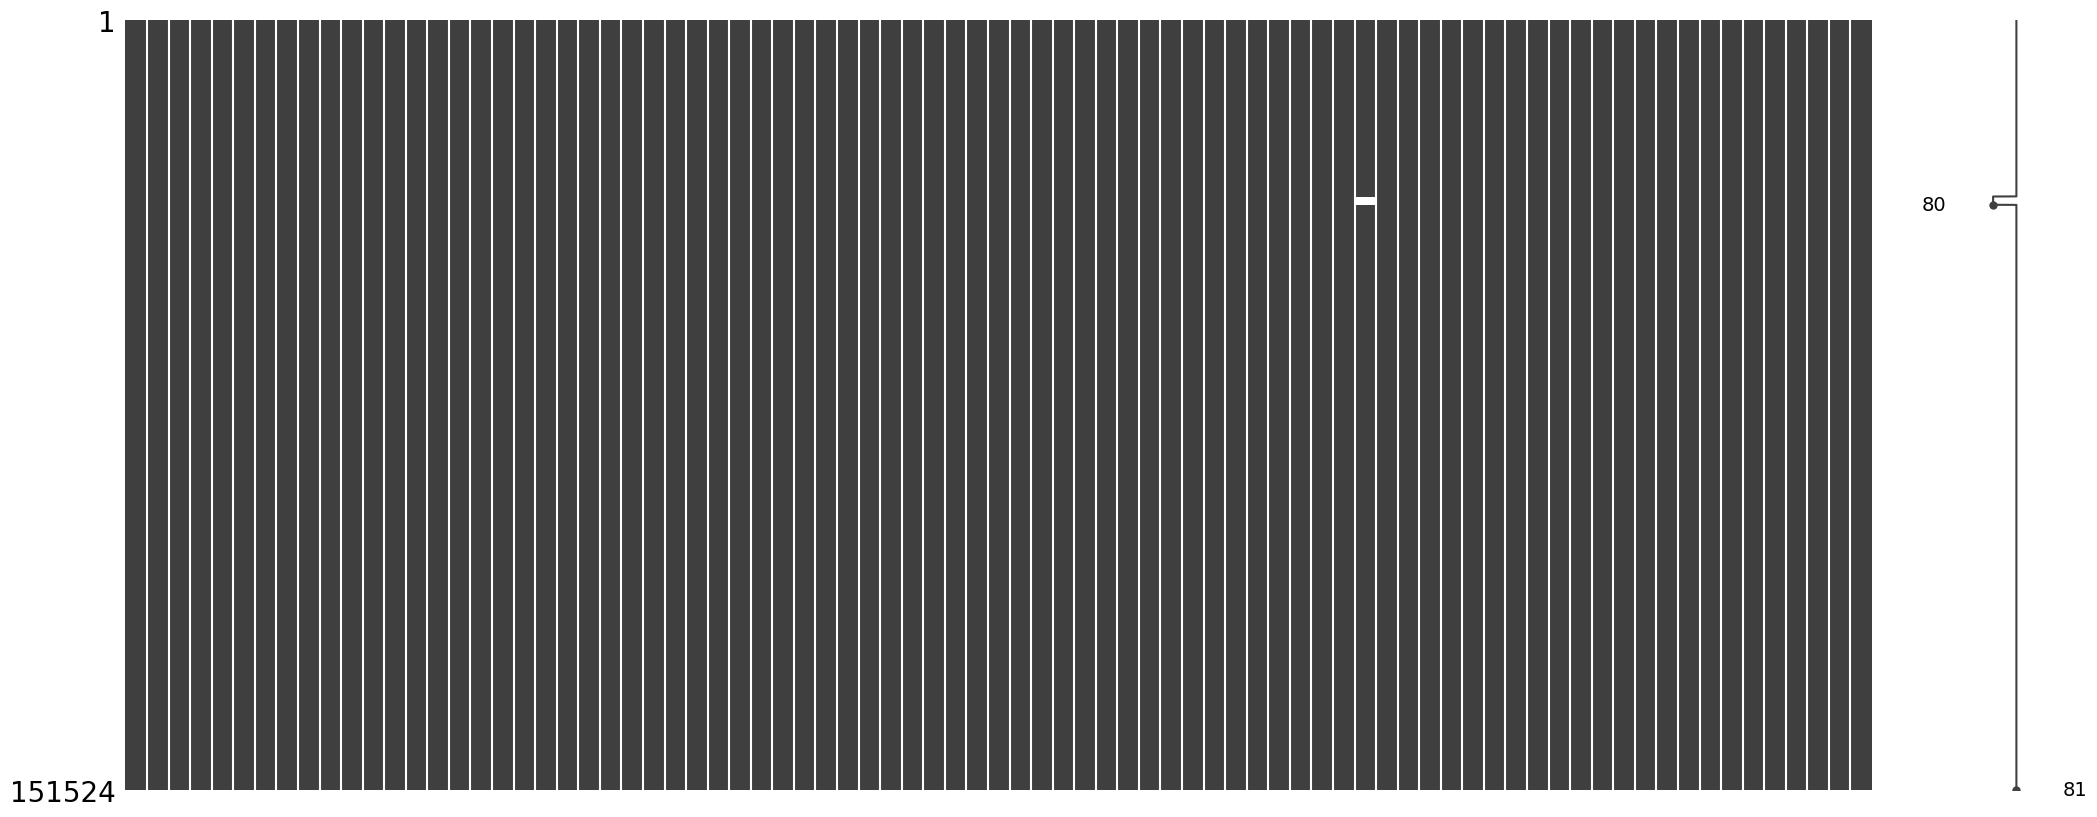

In [32]:
import missingno as msno
msno.matrix(df)
plt.show()

Contiene 1649 nulos.

In [34]:
df = df.drop(columns=["snow_depth (m)"], axis=1)

### Selección de variables

In [40]:
df = Cleaner.apply_basic(df)

In [42]:
df

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,last_min_takeoffs,last_min_landings,...,cloud_cover_mid (%),cloud_cover_high (%),is_day (),wind_speed_10m (km/h),wind_direction_10m (°),wind_direction_100m (°),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,0,1,...,0,4,0,1.5,14,333,0.273,13.9,0.141,0.0


In [50]:
df.shape

(151524, 61)

In [52]:
df.to_parquet("datos.parquet")